# Séance 1

Ce laboratoire a pour objectif de manipuler et analyser les signaux 1D dans le domaine temporel et fréquentiel.

**Remise**: 

La date de remise est le vendredi 28 septembre à 23h59. Une pénalité de 3 points par jour sera appliquée lors d'un retard.

**Documents à remettre** :


Les exercices doivent être codés dans ce fichier TP.ipynb. Les réponses aux questions doivent être incluses dans le code sous forme de commentaires ou dans des cellules dédiées (*Markdown* ou *text*). Les exercices doivent être séparés par des cellules, suivant le template fourni. Vous devez bien identifier chaque exercice et sous-question, et bien commenter le code. Veuillez nommer vos variables de manière explicite et assurez-vous que toutes les figures soient lisibles.

Créer un fichier de rendu html (*Fichier -> Télécharger au format... -> HTML*)  de votre code et de vos graphiques. Veuillez remettre tous vos fichiers (.ipynb, html et autres) dans un seul fichier zip et nommez ce fichier selon vos matricules (Mat1\_Mat2.zip).


Une pénalité de 3 points sera appliquée si ces consignes ne sont pas respectées.

In [22]:
## Imports
import numpy as np
import timeit
import matplotlib.pyplot as plt
import math

## Exercice 1 (2 points)

1-a. (0.25 point) Tracez le signal $s(t) = \dfrac{sin(\pi t)}{\pi t}$ sur l'intervalle $t \in [-4;4]$ avec une résolution de 1000 points (vous pouvez utiliser la fonction [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) pour générer le vecteur $t$). N'oubliez pas le titre et la légende (comme pour tous les autres graphiques que vous tracerez en laboratoire) ! 

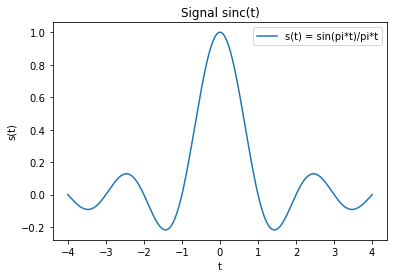

In [2]:
## Code ##
N = 1000
t = np.linspace(-4, 4, N, endpoint=True)

s = np.sin(np.pi * t)/(np.pi*t)

plt.plot(t, s, label = 's(t) = sin(pi*t)/pi*t')

plt.title('Signal sinc(t)')

plt.xlabel('t')

plt.ylabel('s(t)')

plt.legend()

plt.show()


1-b. (0.25 point) Comment se nomme ce signal ?

2. (0.5 point) Tracez dans une nouvelle figure la superposition des signaux: 
\begin{align*}
s_1&=sin(t)  &s_2&=\dfrac{\sin(3 t)}{3} & s_3&=\dfrac{\sin(5 t)}{5}
\end{align*}
sur l'intervalle $t \in [-2; 2]$ et avec une résolution de 500 points.

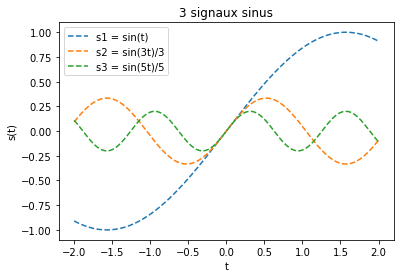

In [3]:
## Code ##
N = 500
t = np.linspace(-2, 2, N, endpoint=True)

s1 = np.sin(t)
s2 = np.sin(3 * t)/(3)
s3 = np.sin(5 * t)/(5)

plt.plot(t, s1, '--', label='s1 = sin(t)')
plt.plot(t, s2, '--', label='s2 = sin(3t)/3')
plt.plot(t, s3, '--', label='s3 = sin(5t)/5')

plt.title('3 signaux sinus')

plt.xlabel('t')

plt.ylabel('s(t)')

plt.legend()

plt.show()

3. (0.5 point) Superposez à ces 3 signaux leur somme $s_1 + s_2 + s_3$. Pour rendre le diagramme plus lisible vous pouvez tracer les 3 signaux en pointillés en ajoutant l'argument **'--'** à la fonction ```plt.plot(x, ..., '--')```. Tracez la somme en gras (```plt.plot(x, ..., linewidth=3)```) sur le même graphique. Ajoutez une légende correspondant à chaque courbe.

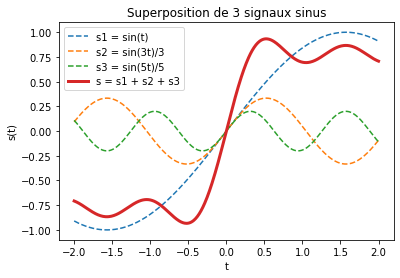

In [4]:
## Code ##

s = s1 + s2 + s3
plt.plot(t, s1, '--', label='s1 = sin(t)')
plt.plot(t, s2, '--', label='s2 = sin(3t)/3')
plt.plot(t, s3, '--', label='s3 = sin(5t)/5')
plt.plot(t, s, linewidth=3, label='s = s1 + s2 + s3')

plt.title('Superposition de 3 signaux sinus')

plt.xlabel('t')

plt.ylabel('s(t)')

plt.legend()

plt.show()

4-a. (0.25 point) Affichez dans une nouvelle figure mais sur le même intervalle $t\in[-2;2]$ et la même résolution de 500 points, le signal: $S_{50}(t) = \dfrac{1}{2} + \dfrac{2}{\pi} \sum_{i=0}^{50} \dfrac{\sin((2i+1) t)}{2i+1}$, c'est à dire la somme de $\frac{1}{2}$ et des $\frac{2}{\pi}\frac{\sin(k t)}{k}$ avec $k$ impair de $1$ à $101$

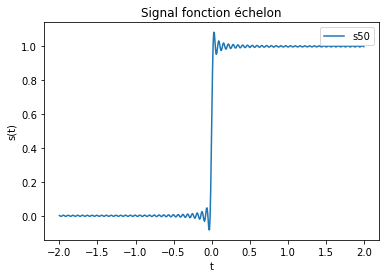

In [5]:
## Code ##
N = 500
t = np.linspace(-2, 2, N, endpoint=True)

sommation = 0
for i in range (0, 50):
    sommation += np.sin((2*i + 1) * t)/(2*i + 1)
                                        
s50 = 0.5 + 2/np.pi * sommation

plt.plot(t, s50, label='s50')

plt.title('Signal fonction échelon')

plt.xlabel('t')

plt.ylabel('s(t)')

plt.legend()

plt.show()

4-b. (0.25 point) Enfin, réessayez pour $i$ allant de $0$ à $500$ ($k$ allant de $1$ à $1001$). Sur l'intervalle considéré, quel signal remarquable est approximé par cette somme de sinusoïdales ?

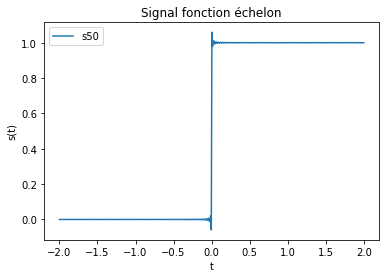

In [6]:
## Code ##
N = 500
t = np.linspace(-2, 2, N, endpoint=True)

sommation = 0
for i in range (0, 500):
    sommation += np.sin((2*i + 1) * t)/(2*i + 1)
                                        
s50 = 0.5 + 2/np.pi * sommation

plt.plot(t, s50, label='s50')

plt.title('Signal fonction échelon')

plt.xlabel('t')

plt.ylabel('s(t)')

plt.legend()

plt.show()

## Exercice 2 (3.5 points)

Soit le signal analogique $Y(t)$ suivant :

\begin{align}
Y(t) = 2\sin( 165\pi t ) + 13\cos( 6\pi t ) - 3\cos( 80\pi t )
\end{align}

1. (0.5 point) Déterminez théoriquement les fréquences présentes dans ce signal.

2. (1 point) Tracez le signal $Y(t)$ pour $0 \leq t \leq 1$ avec une fréquence d'échantillonnage $F_e$ de 20Hz, 75Hz, 100Hz, 160Hz, 180 Hz et 330Hz. Utilisez la commande [plt.subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) afin de créer plusieurs graphique (partageant les mêmes abscisses) et de les afficher l'un en dessous de l'autre. Ajoutez un titre au graphique, une étiquette aux axes pour chaque graphique. Utilisez ylim pour contrôler l'échelle de l'ordonnée.

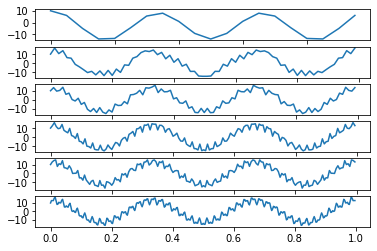

In [7]:
## Code ##

t1 = np.arange(0, 1, 1/20)
t2 = np.arange(0, 1, 1/75)
t3 = np.arange(0, 1, 1/100)
t4 = np.arange(0, 1, 1/160)
t5 = np.arange(0, 1, 1/180)
t6 = np.arange(0, 1, 1/330)

y1 = 2 * np.sin(165 * np.pi * t1) + 13 * np.cos(6 * np.pi * t1) - 3 * np.cos(80 * np.pi * t1)
y2 = 2 * np.sin(165 * np.pi * t2) + 13 * np.cos(6 * np.pi * t2) - 3 * np.cos(80 * np.pi * t2)
y3 = 2 * np.sin(165 * np.pi * t3) + 13 * np.cos(6 * np.pi * t3) - 3 * np.cos(80 * np.pi * t3)
y4 = 2 * np.sin(165 * np.pi * t4) + 13 * np.cos(6 * np.pi * t4) - 3 * np.cos(80 * np.pi * t4)
y5 = 2 * np.sin(165 * np.pi * t5) + 13 * np.cos(6 * np.pi * t5) - 3 * np.cos(80 * np.pi * t5)
y6 = 2 * np.sin(165 * np.pi * t6) + 13 * np.cos(6 * np.pi * t6) - 3 * np.cos(80 * np.pi * t6)

f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)

ax1.plot(t1, y1)
ax2.plot(t2, y2)
ax3.plot(t3, y3)
ax4.plot(t4, y4)
ax5.plot(t5, y5)
ax6.plot(t6, y6)
plt.show()

3. (1 point) Comment la fréquence d'échantillonnage affecte la forme du signal?

4. (1 point) Lesquelles, parmi ces fréquences d'échantillonnage, satisfont le théorème de Nyquist-Shannon? En pratique, quel compromis doit-on faire lors du choix d'une fréquence d'échantillonnage ?

## Exercice 3 (5.5 points)

Soient les trois signaux sinusoïdaux $Y_1(t)$, $Y_2(t)$ et $Y_3(t)$ suivants :
\begin{align*}
Y_1(t) &= 7 \sin( 2\pi\times10 t )\\
Y_2(t) &= 4 \sin( 2\pi\times25 t + \frac{\pi}{3})\\
Y_3(t) &= 3 \cos( 2\pi\times50 t )
\end{align*}

Ces signaux sont échantillonnés à la fréquence $F_e = 250$Hz et seront observés sur l'intervalle: 
\begin{align*} 0 \leq t \leq 1 \end{align*}

1. (1 point) Tracez les trois signaux $Y_1(t)$, $Y_2(t)$ et $Y_3(t)$. Mettez un titre, une légende et les étiquettes des axes x et y.

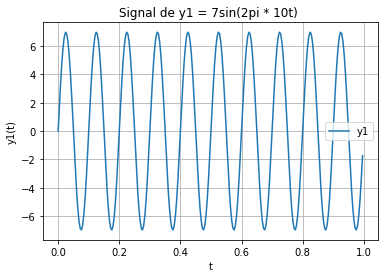

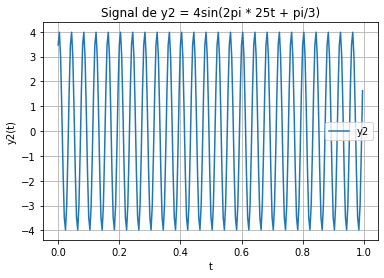

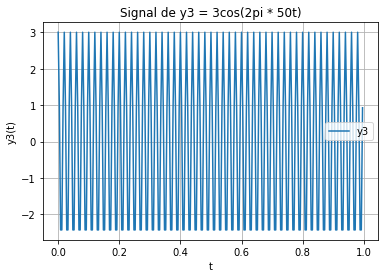

In [8]:
## Code ##
t = np.arange(0, 1, 1/250)

y1 = 7 * np.sin(2 * np.pi * 10 * t)
y2 = 4 * np.sin(2 * np.pi * 25 * t + np.pi/3)
y3 = 3 * np.cos(2 * np.pi * 50 * t)

plt.plot(t, y1, label='y1')
plt.title('Signal de y1 = 7sin(2pi * 10t) ')

plt.xlabel('t')

plt.ylabel('y1(t)')

plt.legend()
plt.grid()

plt.show()
plt.plot(t, y2, label='y2')
plt.title('Signal de y2 = 4sin(2pi * 25t + pi/3)')

plt.xlabel('t')

plt.ylabel('y2(t)')

plt.legend()
plt.grid()

plt.show()
plt.plot(t, y3, label='y3')

plt.title('Signal de y3 = 3cos(2pi * 50t)')

plt.xlabel('t')

plt.ylabel('y3(t)')

plt.legend()
plt.grid()

plt.show()

2. (0.5 point) Déterminez graphiquement la période de chacun de ces signaux. Comparez chaque résultat avec sa valeur théorique.

3-a. (0.25 point) Tracez le signal composite $Z(t)=Y_1(t) + Y_2(t) + Y_3(t)$. 

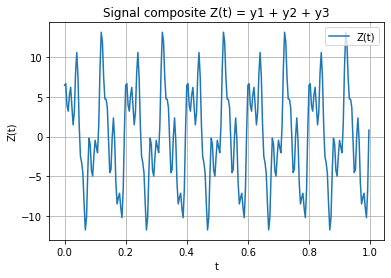

In [9]:
## Code ##
z = y1 + y2 + y3

plt.plot(t, z, label='Z(t)')
plt.title('Signal composite Z(t) = y1 + y2 + y3')

plt.xlabel('t')

plt.ylabel('Z(t)')

plt.legend()
plt.grid()

plt.show()

3-b. (0.25 point) Graphiquement, quelle semble être la fréquence du signal $Z(t)$? Déterminez analytiquement cette fréquence sachant que la fréquence d'un signal composite est égal au plus grand diviseur commun des fréquences des signaux qui le composent.

4. (1 point) Calculez la transformée de Fourier rapide (FFT) des signaux $Y_1(t)$, $Y_2(t)$ et $Y_3(t)$ à l'aide de la fonction [np.fft.fft](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) et affichez le spectre de fréquence de chacun. Que remarquez vous?

In [10]:
def getfft(signal, fe):
    sp1 = np.fft.fft(signal)
    amp = np.abs(sp1)
    n = len(amp)
    freq = np.linspace(0, fe/2, n//2)
    amp = amp[:n//2]
    amp = 2 * (amp/n)
    
    return (freq, amp)

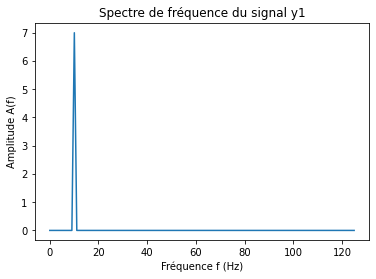

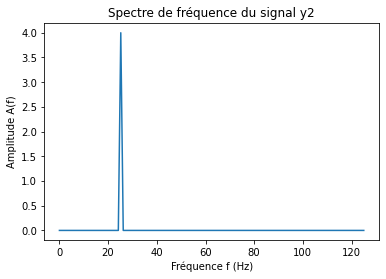

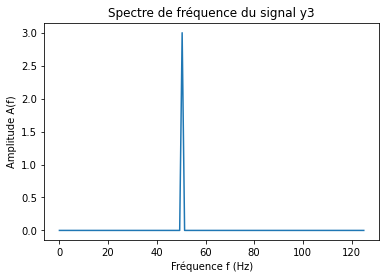

In [11]:
## Code ##
Fe = 250

(freq, amp) = getfft(y1, Fe)
plt.title('Spectre de fréquence du signal y1')
plt.xlabel('Fréquence f (Hz)')
plt.ylabel('Amplitude A(f)')
plt.plot(freq, amp)
plt.show()

(freq, amp) = getfft(y2, Fe)
plt.title('Spectre de fréquence du signal y2')
plt.xlabel('Fréquence f (Hz)')
plt.ylabel('Amplitude A(f)')
plt.plot(freq, amp)
plt.show()

(freq, amp) = getfft(y3, Fe)
plt.plot(freq, amp)
plt.title('Spectre de fréquence du signal y3')
plt.xlabel('Fréquence f (Hz)')
plt.ylabel('Amplitude A(f)')
plt.show()

In [12]:
# Nous remarquons que les pics sont aux fréquences et la valeur à ces fréquences correspondent aux amplitudes.
# Par exemple, pour y1 = 7sin(2𝜋×10𝑡), où l'amplitude = 7 et la fréquence = 10, nous voyons que dans son spectre
# de fréquence, il y a un pic à f = 10 et sa valeur est de 7.

5. (1 point) Calculez la TFD du signal composite et affichez son spectre de fréquence. Que remarquez-vous?

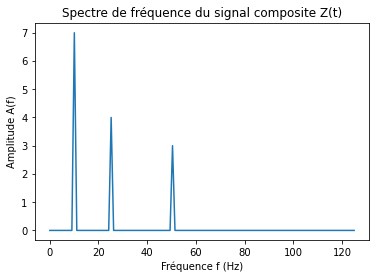

In [13]:
(freq, amp) = getfft(z, Fe)
plt.plot(freq, amp)
plt.title('Spectre de fréquence du signal composite Z(t)')
plt.xlabel('Fréquence f (Hz)')
plt.ylabel('Amplitude A(f)')
plt.show()

6. (1 point) On rappelle que la transformée de Fourier discrète (TFD) du signal s(n) à N échantillons est définie par:
\begin{align}
S[k] = \sum_{n=0}^{N-1} s(n)e^{-2i\pi n k/N}
\end{align} pour $0 \leq k < N$.
Jusqu'à présent, vous avez utilisé la fonction fft (*Fast Fourier Transform*) offerte par *numpy*, qui n'est qu'une optimisation computationnelle du calcul de la TFD. Mais est-elle vraiment plus rapide que la TFD brute? 
Complétez le code suivant calculant la TFD d'un signal s:
    ```python
def tfd(s):
    N = len(s)
    S = np.zeros(N, dtype=complex)
    n = np.arange(0, N)
    exp_basis = np.exp(-2j*np.pi*n/N)
    for k in range(N):
        
        S[k] = np.sum(...)
    
    return S
```
Vérifiez que vous obtenez le même spectre de $Z(t)$ avec votre fonction et la fft (tracez-le).

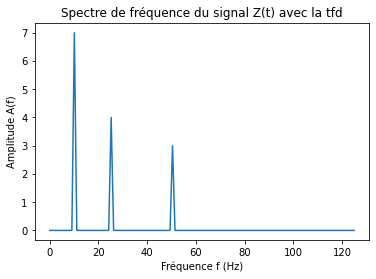

In [14]:
## Code ##
def tfd(s):
    N = len(s)
    S = np.zeros(N, dtype=complex)
    n = np.arange(0, N)
    exp_basis = np.exp(-2j*np.pi*n/N)
    for k in range(N):
           S[k] = np.sum(s[n] * exp_basis**k)
    return S

tfdSignal= tfd(z)
amp = np.abs(tfdSignal)
n = len(amp)
freq = np.linspace(0, Fe/2, n//2)
amp = amp[:n//2]
amp = 2 * (amp/n)

plt.title('Spectre de fréquence du signal Z(t) avec la tfd')
plt.xlabel('Fréquence f (Hz)')
plt.ylabel('Amplitude A(f)')
plt.plot(freq, amp)
plt.show()

On peut donc constater que le spectre du signal Z(t) calculé avec notre fonction tfd est le même que celui calculer avec la fonction fft.

7. (0.5 point) A l'aide du module [timeit](https://docs.python.org/3/library/timeit.html), comparez le temps d'executions de la fonction np.fft.fft et de votre fonction tdf, sur 100 itérations. Aidez-vous pour cela du code ci-dessous. Qu'en concluez-vous?
```python
temps = timeit.timeit(lambda:ma_fonction(args), n=nb_iterations) # A ajuster
```

In [15]:
## Code ##
print("Temps d'exécution de np.fft.fft: " + str(timeit.timeit("getfft(z, Fe)", number=100, globals=globals())))
print("Temps d'exécution de tfd(z): " + str(timeit.timeit("tfd(z)", number=100, globals=globals())))

Temps d'exécution de np.fft.fft: 0.006258600000023762
Temps d'exécution de tfd(z): 1.5661575999999968


# Séance 2
## Exercice 4 (9 points)
*Cet exercice laisse plus de place à l'interprétation, discutez et analysez vos résultats!*

Un mystérieux enregistrement a été retrouvé lors d'une maintenance des serveurs Moodle. Cependant il semble bien peu audible; comme si un chargé de laboratoire facétieux s'était amusé à y ajouter des signaux parasites... 

Qu'à cela ne tienne, vous vous proposez de le décrypter en utilisant votre expertise en traitement du signal.

In [44]:
## Imports
import IPython.display as ipd
import scipy.io.wavfile as wavfile
from scipy.signal import firwin, lfilter, freqz, iirfilter

1. (1 point) Chargez le fichier *audio.wav* à l'aide de la fonction [scipy.io.wavfile.read](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html). 
Celle-ci renvoie deux variables: la fréquence d'échantillonnage et le signal audio.

Vous pouvez écouter le signal sonore original ou filtré à l'aide de la fonction [IPython.display.Audio](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html). 
 
```python
ipd.Audio(signal, rate=sample_rate)
```
En écoutant le signal, repérez la ou les perturbations de la mélodie principale. Pour chaque perturbation, précisez si le signal est haute ou basse fréquence.

In [45]:
## Code ##
frequence, signal = wavfile.read("corrupted_audio.wav")
ipd.Audio(signal, rate=frequence)

2-a. (0.5 point) Calculez la TFD du signal audio et affichez-la. Ajouter un titre et les axes.

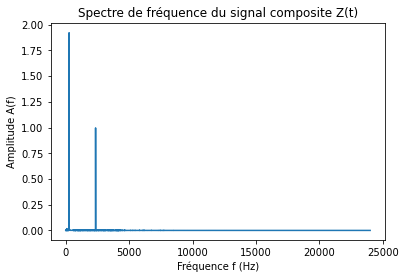

In [46]:
## Code ##
(freq, amp) = getfft(signal, frequence)
plt.plot(freq, amp)
plt.title('Spectre de fréquence du signal composite Z(t)')
plt.xlabel('Fréquence f (Hz)')
plt.ylabel('Amplitude A(f)')
plt.show()

2-b. (0.5 point) Quelle est la note (do, ré, mi, fa, sol, la ou si) correspondant aux perturbations? Aidez-vous de [l'article Wikipédia](http://fr.wikipedia.org/wiki/Note_de_musique) et du spectre de fréquence affiché.

3. (0.5 point) Pour filtrer la perturbation la plus aigue, vous allez concevoir un filtre passe-bas. Comme vu en cours, un filtre est défini par plusieurs paramètres: sa fréquence de coupure, son ordre et le type de fenêtre employé.
Donnez la définition de la fréquence de coupure.

4. (1 point) En utilisant les fonctions [scipy.signal.firwin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) et [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html), concevez un filtre passe bas d'ordre 128 pour filtrer la perturbation à la plus haute fréquence.  En tenant compte de la définition donnée ci-dessus, comment choisir une bonne fréquence de coupure? Filtrez la musique avec le filtre que vous venez de concevoir et décrivez ce que vous entendez. N'hésitez pas à jouer sur la fréquence de coupure pour observer son effet.
Que se passe-t-il si elle est trop haute? Et si elle est trop basse? Quel type de filtre serait plus approprié à la pertubation considérée?


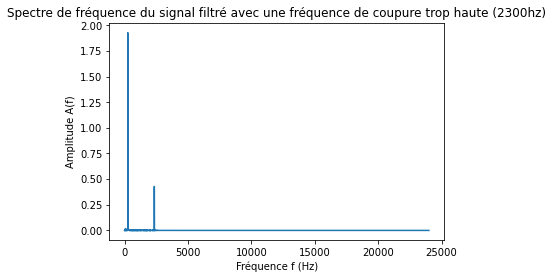

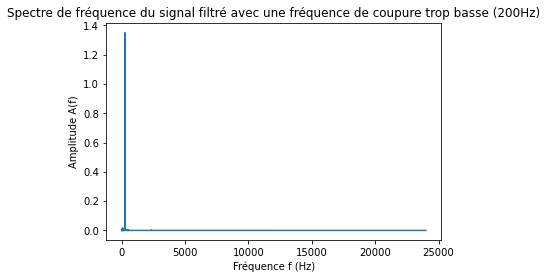

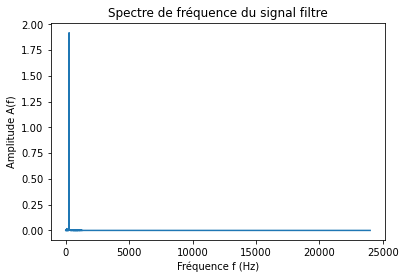

In [48]:
## Code ##

def low_cut_filter(x, fs, cutoff):
    nyquist = fs // 2
    norm_cutoff = cutoff / nyquist
    order = 128
    fil = firwin(order + 1, norm_cutoff, pass_zero='lowpass') #fir
    
    lcf_x = lfilter(fil, 1, x)

    return lcf_x 


f_coupure_trop_haute = 2300
filtered_signal = low_cut_filter(signal, frequence, f_coupure_trop_haute)
(freq, amp) = getfft(filtered_signal, frequence)
plt.plot(freq, amp)
plt.title('Spectre de fréquence du signal filtré avec une fréquence de coupure trop haute (2300hz)')
plt.xlabel('Fréquence f (Hz)')
plt.ylabel('Amplitude A(f)')
plt.show()

f_coupure_trop_basse = 200
filtered_signal = low_cut_filter(signal, frequence, f_coupure_trop_basse)
(freq, amp) = getfft(filtered_signal, frequence)
plt.plot(freq, amp)
plt.title('Spectre de fréquence du signal filtré avec une fréquence de coupure trop basse (200Hz)')
plt.xlabel('Fréquence f (Hz)')
plt.ylabel('Amplitude A(f)')
plt.show()

f_coupure = 1200
filtered_signal = low_cut_filter(signal, frequence, f_coupure)
(freq, amp) = getfft(filtered_signal, frequence)
plt.plot(freq, amp)
plt.title('Spectre de fréquence du signal filtre')
plt.xlabel('Fréquence f (Hz)')
plt.ylabel('Amplitude A(f)')
plt.show()

ipd.Audio(filtered_signal, rate=frequence)

5. (1 point) Créez trois filtres passe-haut d'ordre 128 et de fréquence de coupure de 750 Hz en utilisant les fenêtres suivantes : Chebyshev, Hamming et Blackman. Pour la fenêtre Chebyshev, utilisez une atténuation de 30 dB.

In [50]:
## Code ##

def high_cut_filter(x, fs, cutoff, window_name):
    nyquist = fs // 2
    norm_cutoff = cutoff / nyquist
    order = 128
    fil = firwin(order + 1, norm_cutoff, window=window_name, pass_zero='highpass') #defaut hamming
    
    lcf_x = lfilter(fil, 1, x)

    return lcf_x 

def chebyshev(x, fs, cutoff, attenuation):
    nyquist = fs // 2
    norm_cutoff = cutoff / nyquist
    order = 128
    fil = iirfilter(order + 1, norm_cutoff, rs = attenuation, btype='highpass') #defaut hamming
    lcf_x = lfilter(fil, 1, x)

    return lcf_x 


f_coupure = 750
hamming_filtered_signal = high_cut_filter(signal, frequence, f_coupure, 'hamming')
blackman_filtered_signal = high_cut_filter(signal, frequence, f_coupure, 'blackman')
chebyshev_filtered_signal = chebyshev(signal,  frequence, f_coupure, 30)


ValueError: object too deep for desired array

6. (1.5 points) Affichez, pour chaque filtre, sa réponse fréquentielle à l'aide de la fonction [scipy.signal.freqz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html). Sur chaque graphique, tracez la droite verticale passant par la fréquence de coupure. Vous pouvez pour cela utiliser la fonction:
```python
plt.axvline(freq_coupure, color='r', linewidth=2)
```
À quelle atténuation coupe-t-elle la courbe de la réponse fréquentielle? Était-ce prévisible?

In [ ]:
## Code ##

7. (1.5 points) Filtrez le signal audio qui a déjà été filtré avec le filtre passe-bas à l'aide des trois filtres créés précédemment. Lorsque vous écoutez les trois signaux, que remarquez-vous? Pour le filtre passe-haut et en fonction de la fréquence de coupure utilisée, quel va être le compromis sur la qualité du signal restaurée ?

In [ ]:
## Code ##

8. (1 point) Calculez les TFD des signaux filtrés avec les trois filtres et affichez les spectres. Est-ce que les spectres, au niveau des basses fréquences, correspondent à ce que vous avez entendu?

In [ ]:
## Code ##